In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
preverbsDF = pd.read_csv('../data/WiyotPreversText.tsv',sep='\t')
preverbsDF.head()

,Wiyot,English
0,bał/wał/wáł,relating.to
1,be/bé/béh,REP
2,bi/mi/mí,soon
3,bime/mime/bige/bihge/mige,some
4,bo/bó/wo/wó/ba/wa/boh,go.to


In [57]:
preverbs = list(set(preverbsDF.English))
len(preverbs)

77

## Single word frequency

In [53]:
single_frequency = pd.read_csv('../results/word_single_frequency.tsv',sep='\t')
single_frequency.head()

,word,frequency,WiyotEquivalents
0,PST,1310,"['yí', 'ko', 'his', 'he', 'kós', 'i', 'hiš', '..."
1,PROG,1299,"['tá', 'tò,', 'tó,', 'to,', 'do', 'ta', 'te', ..."
2,3SBJ.DEF,1286,"['oł', 'eł', 'ał', 'íł,', 'i', 'ił', 'iš', 'el..."
3,3SBJ.DEF.,1274,"['ùy.', 'íł.', 'eł.', 'ih.', 'uyh.', 'i.', 'ił..."
4,DEM,839,"['čuwokas', 'čuwotoh', 'čuwobókas', 'čuw', 'čé..."


In [59]:
preverbs_single_frequency = single_frequency[single_frequency.word.isin(preverbs)]

In [69]:
len(preverbs_single_frequency)
preverbs_single_frequency.to_clipboard(index=None)

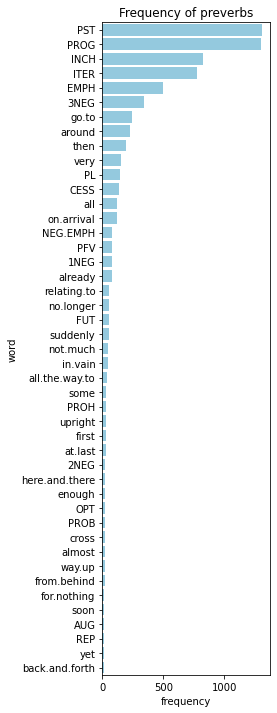

In [67]:
dat = preverbs_single_frequency[preverbs_single_frequency['frequency'] > 10]
plt.figure(figsize=(3,12))
plt.title('Frequency of preverbs')
sns.barplot(y='word',x='frequency',data=dat,color='skyblue')
plt.show()

### Word pairs

In [5]:
word_pair_frequency = pd.read_csv('../results/word_pair_frequency.tsv',sep='\t')

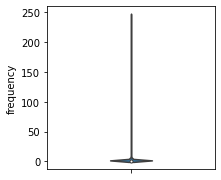

In [72]:
plt.figure(figsize=(3,3))
sns.violinplot(data=word_pair_frequency,y='frequency',width=0.25)
plt.show()

__Word pair w/preverbs__

,word_1,word_2,biword,frequency
0,crow,please,crow|please,1
1,please,call.kin.in.law,please|call.kin.in.law,1
2,call.kin.in.law,NMLZ.A,call.kin.in.law|NMLZ.A,1
3,NMLZ.A,ocean,NMLZ.A|ocean,1
4,ocean,other.side,ocean|other.side,2
...,...,...,...,...
12995,anything,AFF,anything|AFF,1
12996,AFF,do<th.sbjv>,AFF|do<th.sbjv>,1
12997,do<th.sbjv>,2SBJ.SBJV.,do<th.sbjv>|2SBJ.SBJV.,1
12998,for.nothing,go[1sbj],for.nothing|go[1sbj],1


In [75]:
preverbs_pair_frequency = word_pair_frequency[(word_pair_frequency.word_1.isin(preverbs)) | (word_pair_frequency.word_2.isin(preverbs))]

In [93]:
preverbs_pair_frequency.to_csv('../results/preverb_pair_frequency.tsv',sep='\t',index=None)

In [81]:
preverb_pair_frequency_filtered = preverbs_pair_frequency[preverbs_pair_frequency.frequency > 10]
freq_preverb_matrix = preverb_pair_frequency_filtered.pivot(index='word_1',columns='word_2',values='frequency')
print(freq_preverb_matrix.shape)
#freq_matrix = freq_matrix.fillna(0)

(46, 50)


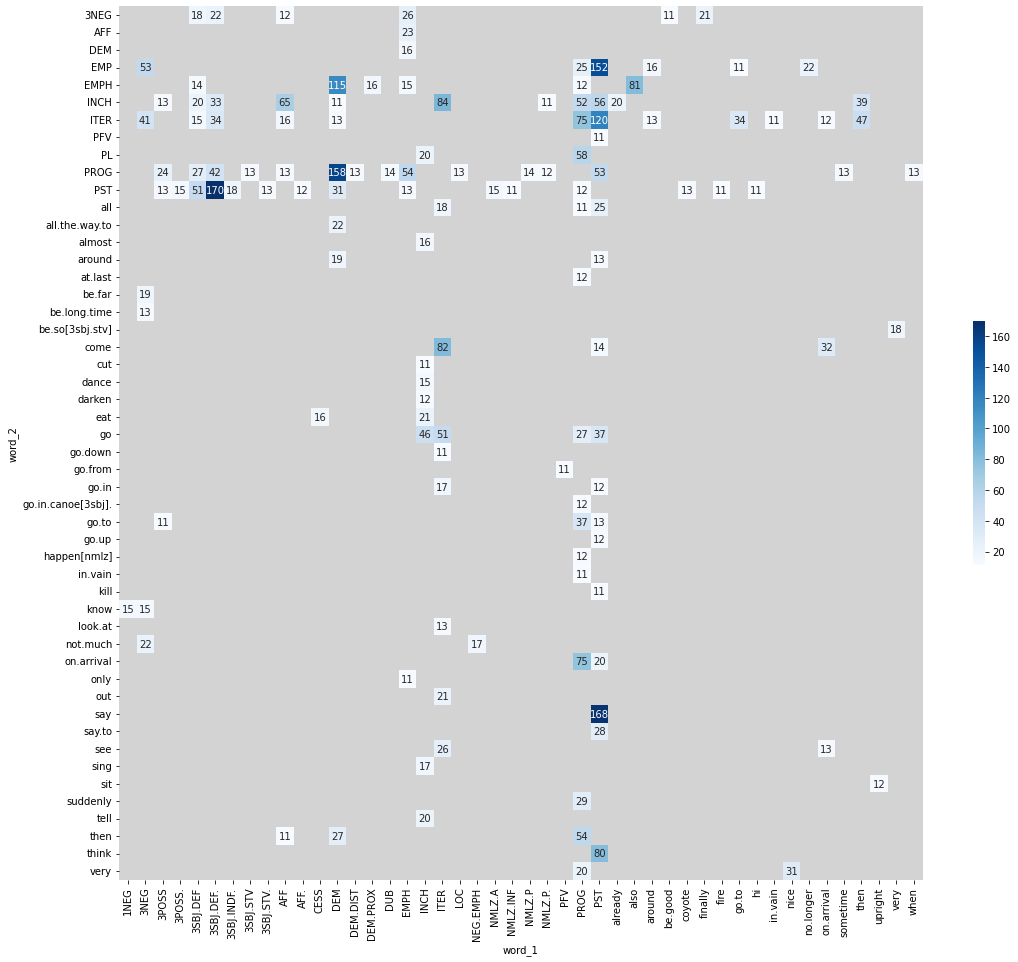

In [86]:
wh = 18
plt.figure(figsize=(wh,wh))
g = sns.heatmap(freq_preverb_matrix.T,cmap="Blues",annot=True,fmt='g',
                cbar_kws={"shrink": .25},square=True)
g.set_facecolor('lightgray')
#g.set_facecolor('whitesmoke')
plt.show()

,Wiyot,English
0,bał/wał/wáł,relating.to
1,be/bé/béh,REP
2,bi/mi/mí,soon
3,bime/mime/bige/bihge/mige,some
4,bo/bó/wo/wó/ba/wa/boh,go.to


In [94]:
metadata = pd.DataFrame(preverbs,columns=['word'])
metadata['type'] = 'preverb'
metadata.head()
metadata.to_csv('../results/metadata_preverbs.tsv',sep='\t',index=None)

4277